<h1>Experiment, Study and Result </h1>
<h3>Model</h3>
The are some model that have been studied for this project, namely "MesoNet", "MesoInception4", "VGG16", "EfficientNet" and "InceptionResNetV2".
However, as I am using my own GPU for training (RTX2070 Super), it only contains 8GB gpu-ram and therefore may not have enough time to handle "InceptionResNetV2", as they have very deep structure.

For the tested model, the parameter including the learning rate, earlystopping and learning reduced are fine turned many times for each model, only the best result of each model will be given.


<h4>============================== Tested ==============================</h4>
<h4>MesoNet</h4>
The the MesoNet is a shallow convolutional neural network which comprises a sequence of four convolution layers and pooling and is followed by a fully connected dense layer with one hidden layer in between. The convolutional layers use ReLu as activation function and baatch normalization to regularize the output, in which, it can preven the vanishing gradient problem. The dropout applied at the fully-connected layers can improve the robustness and take generalization on another level.

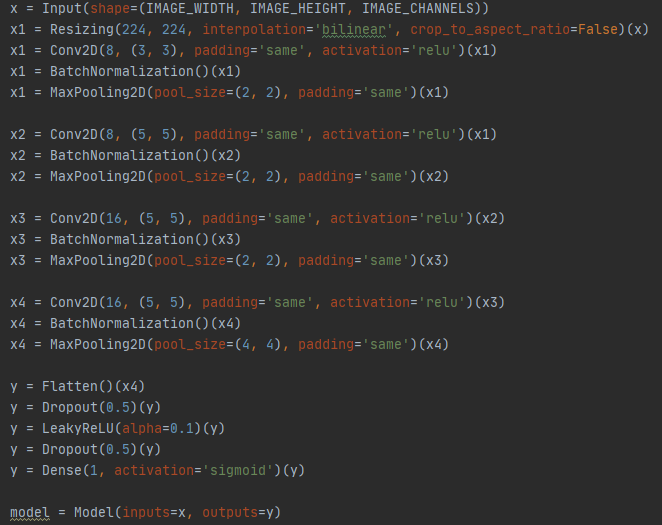

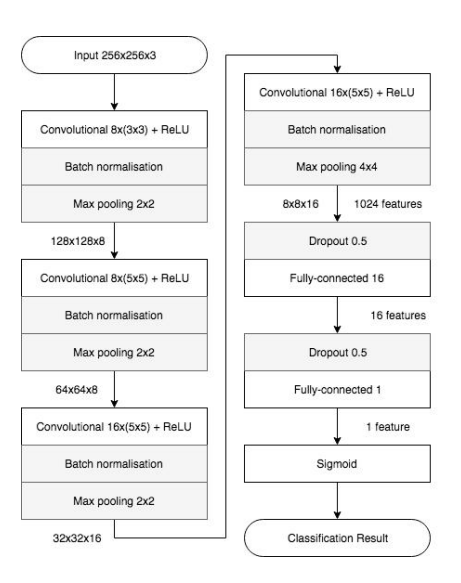
from https://arxiv.org/pdf/2106.12605.pdf (Deep Fake Detection : Survey of Facial
Manipulation Detection Solutions)

==============================

In this project, the result provided by MesNet is not as good as other and here is the best result:

"loss: 0.1781 - accuracy: 0.7299 - val_loss: 0.1650 - val_accuracy: 0.7492".

(Use "earlystop = val_loss" and "ReduceLROnPlateau = val_accuracy" for callbacks, lr = 0.001)

==============================


<h4>MesoInception4</h4>
The MesoInception4 is a model that based on MesoNet, it used a InceptionLayer to replace all single convolutional layer in MesNet.

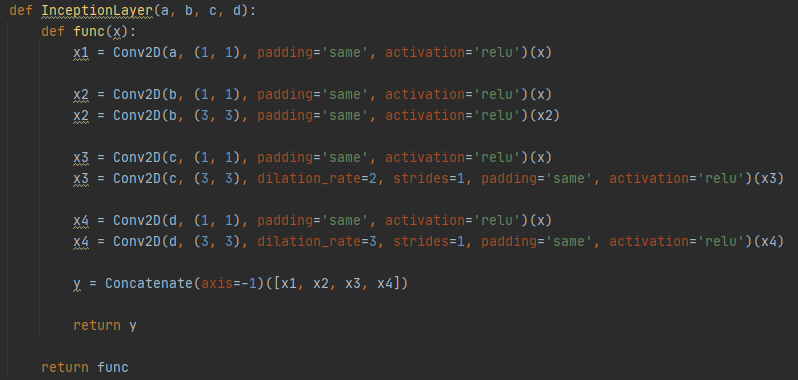

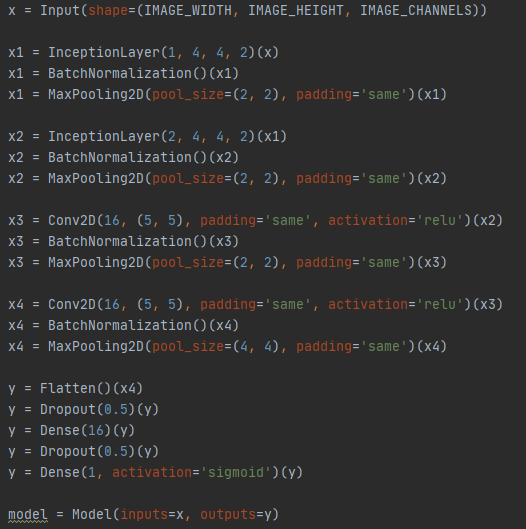

==============================


In this project, the result provided by MesoInception4 is quite good and here is the best result:

"loss: 0.1816 - accuracy: 0.9269 - val_loss: 0.1709 - val_accuracy: 0.9275"

(Use" earlystop = loss" and "ReduceLROnPlateau = accuracy" for callbacks, lr = 0.001)

==============================

<h4>VGG16</h4>
The VGG16 is a simple and widely used Convolutional Neural Network, it only contain 5 convolutional block

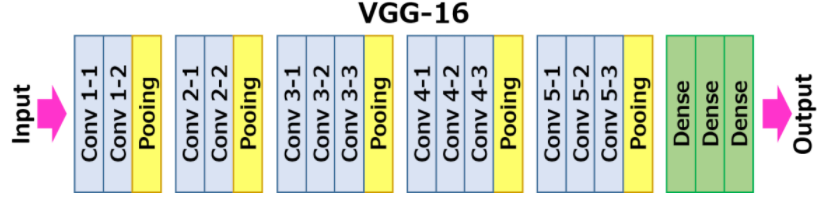
from https://neurohive.io/en/popular-networks/vgg16/


With refer to the configurations list, I had implemented config-C for experiment, however, the units of dense(fully-connect) layer has reduced to 1024 and 2048 due to the memory of my GPU. If I keep using 4096 units, my GPU will not have enough memory and cause an error. A self-defined top level layer have added to the model.

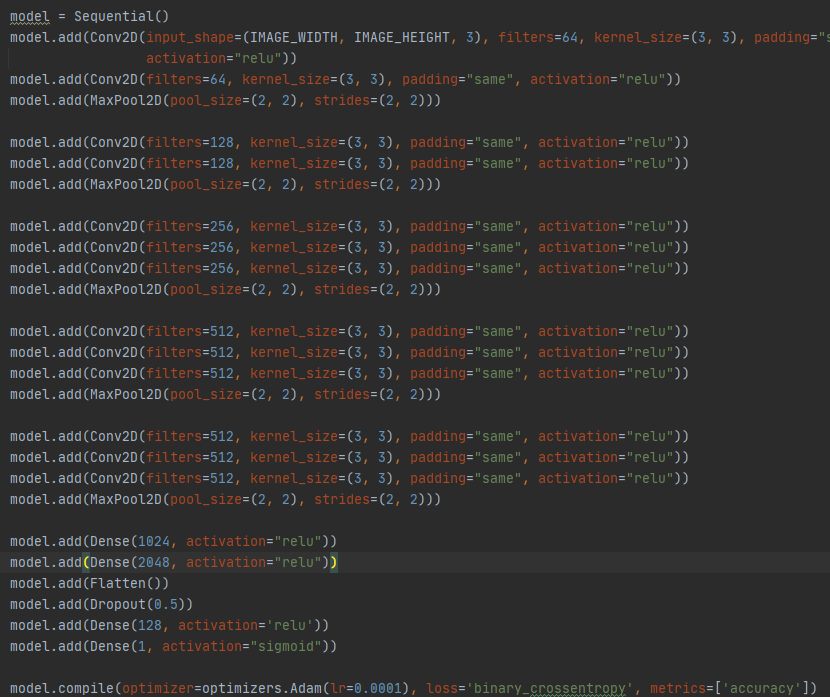


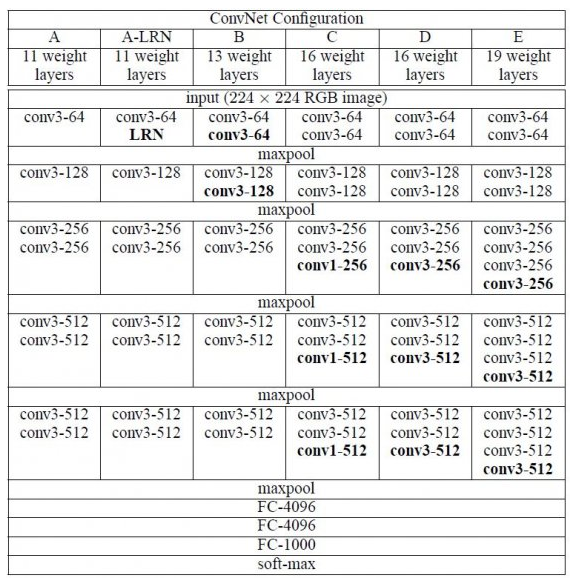
from https://arxiv.org/abs/1409.1556 (Very Deep Convolutional Networks for Large-Scale Image Recognition)


The result of the VGG16 is quite weird which the accuracy does not improve after any epoch, many fine turning have be done to VGG16, and even pre-trained weight has also been tested, however, the result still the same. I had already sent many email to TAs, but none of their suggestion works :

" loss: 0.6368 - accuracy: 0.6667 - val_loss: 0.6368 - val_accuracy: 0.6667 "

(Use" earlystop = loss" and "ReduceLROnPlateau = val_accuracy" for callbacks, lr = 0.0001)

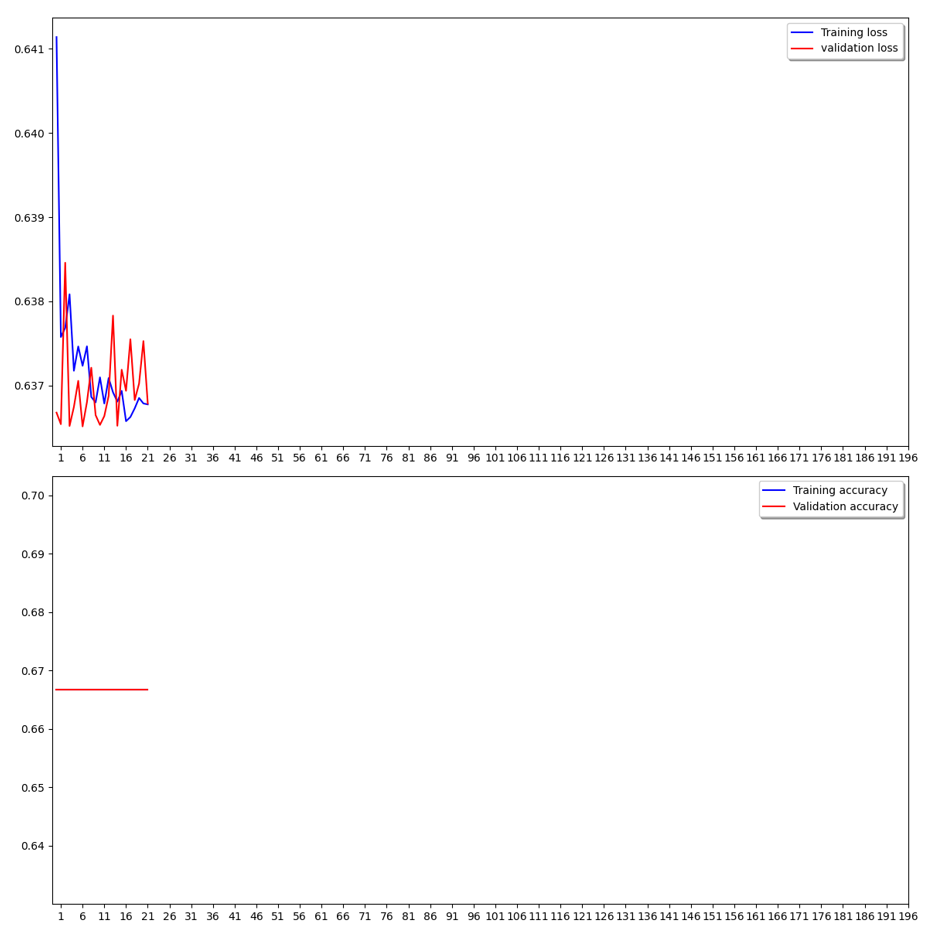



<h4>EfficientNet B0, B3, B5, B7</h4>
EfficientNet B0 is a model implentented using AutoML MNA, one of the objective of EfficientNet is to increase the efficient of training, compare with other tested model, its performance is amazing ! The training accuracy comes to ~90% with less than 10 epochs, which the other tested network need more than 15~20 epoch under the same learning rate. 
For the EfficientNet B1-B7, they are just scaled up version of B0, which included "width scaling", "Depth Scaling", "Resolution Scaling" and "Compound scaling".

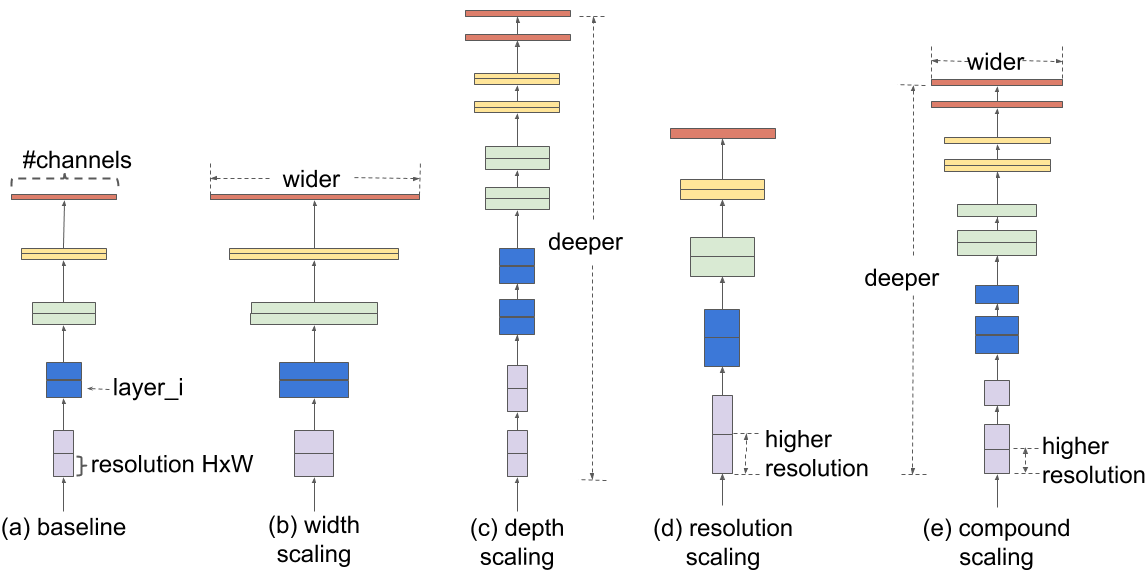
from https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html


The EfficientNet model is created using the library of keras, and self created the top  layer for it :

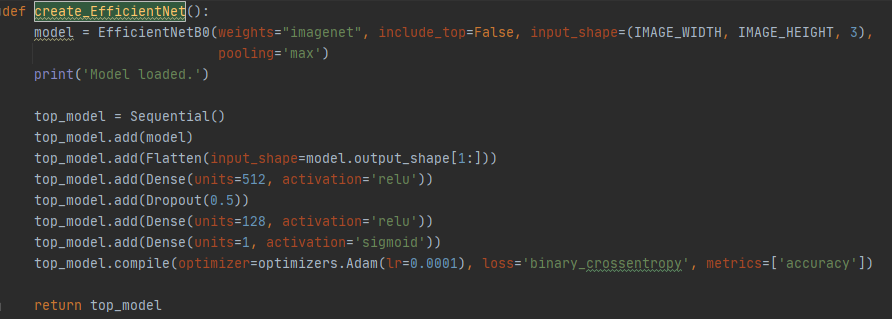

The structure of EfficientNet B0:
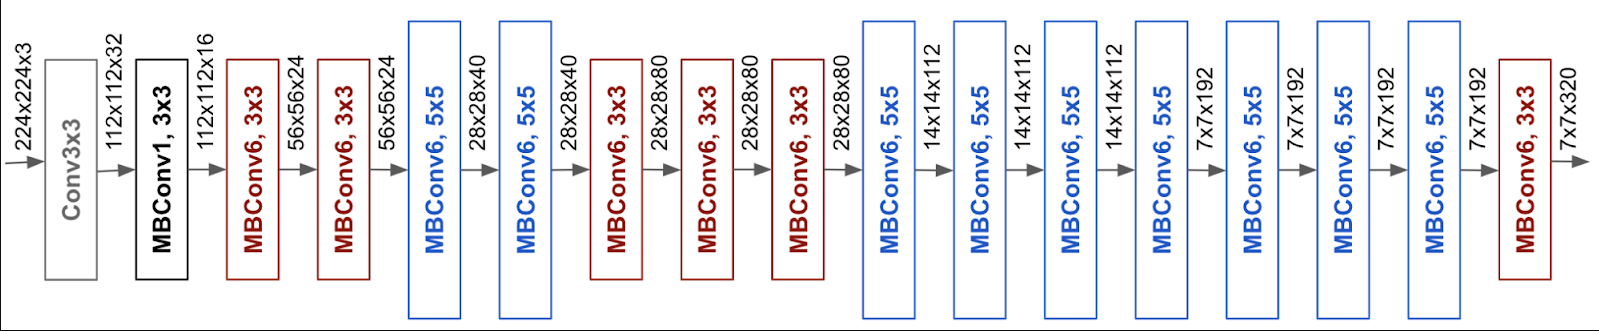
from https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html


==============================

In this project, B0, B3, B5 and B7 share the same structure of top level layer : 
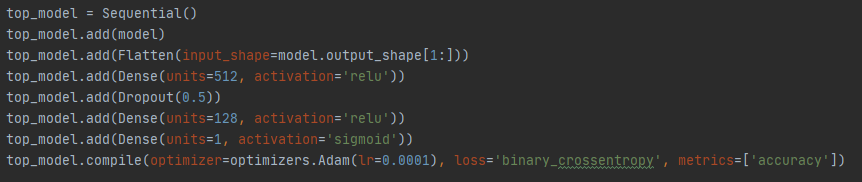



the best result provided by <b>EfficientNet B0</b> :

"loss: 0.0192 - accuracy: 0.9934 - val_loss: 0.2740 - val_accuracy: 0.9317"

(Use" earlystop = loss" and "ReduceLROnPlateau = val_accuracy" for callbacks, lr = 0.0001)




the best result provided by <b>EfficientNet B3</b> :

"loss: 0.0141 - accuracy: 0.9950 - val_loss: 0.7142 - val_accuracy: 0.7404"

(Use" earlystop = loss" and "ReduceLROnPlateau = val_accuracy" for callbacks, lr = 0.0001)




the best result provided by <b>EfficientNet B5</b> :

"loss: 0.0055 - accuracy: 0.9978 - val_loss: 0.1523 - val_accuracy: 0.9638"

(Use" earlystop = loss" and "ReduceLROnPlateau = val_accuracy" for callbacks, lr = 0.0001)




the best result provided by <b>EfficientNet B7</b> :

"loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.0719 - val_accuracy: 0.9804"

(Use" earlystop = loss" and "ReduceLROnPlateau = val_accuracy" for callbacks, lr = 0.0001)

==============================


<h4>ResNet50</h4>
The "ResNet" is a kind of CNN structure introduced by Kaimei He in 2016 (Deep Residual Learning for Image Recognition
), it prevoide the ability to create a very deep network with a low probability of happening "Gradient Vanishing" or "Degradation problem". In the past, when the layer of a network become very deep, it will affect the model's learning power and cannot be improved in certain iteration. And this is the result why "ResNet" is choosen.
In "ResNet", the important thing is identity transform, which is a shortcut simply speaking. 
The shortcut will cross over the current layer components and become the second next layer's input and activation function.
The "ResNet50" model use Adam as the optimizer which is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments, and the loss is set to be binary crossentropy due to the face that this project is a binary classfication problem (fake or real faces).



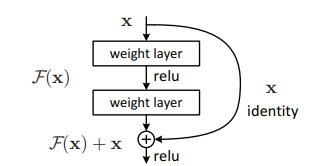



identity_block :
The identity block is the standard block used in ResNets, and corresponds to the case where the input activation has the same dimension as the output activation. 
The upper path is the "shortcut path." The lower path is the "main path." In this diagram, we have also made explicit the CONV2D and ReLU steps in each layer. To speed up training we have also added a BatchNorm step. When the shortcut is used, it will skip connection "skips over" 3 hidden layers.

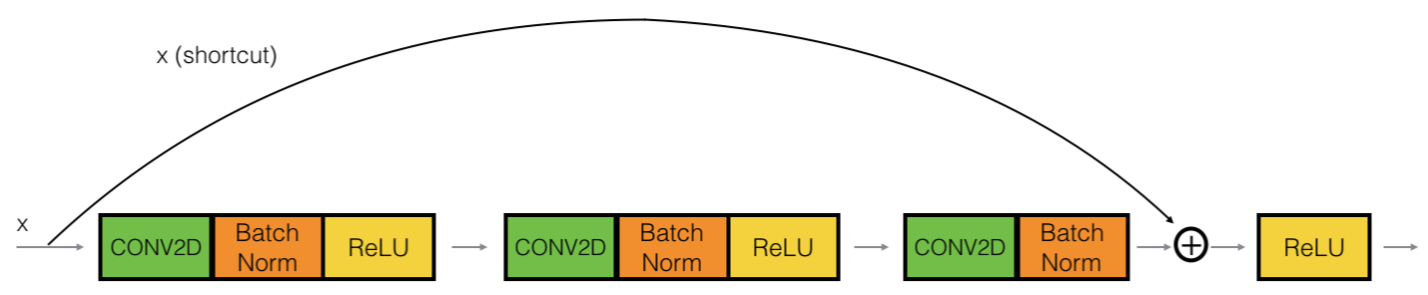

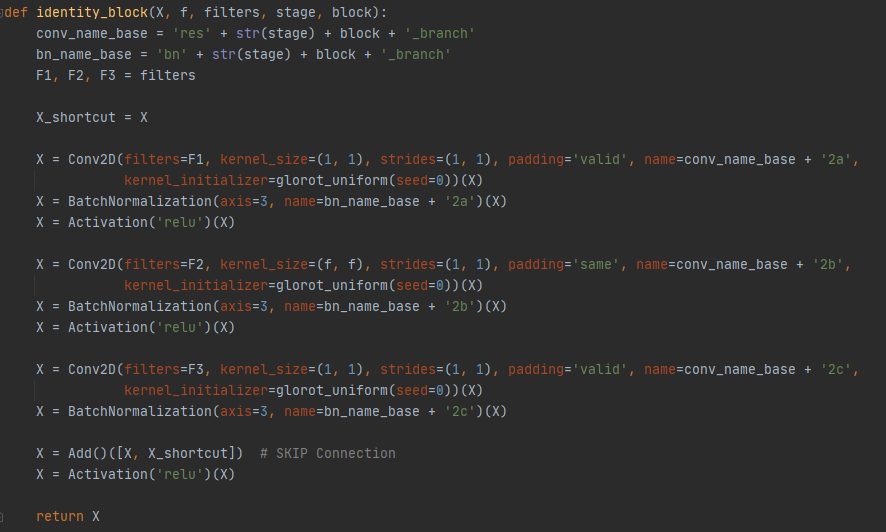


convolutional_block :
The convolutional block is another type of block which is used when there are different bewteen input and output dimensions, there contain a Conv2D layer in the shortcut which is different from the identity block.
The Conv2D layer in shortcut aims to resize the input to other dimension in order to much up with the final addition needed and to add the shortcut value back to the main path. Moreover, the reason why it does not use any activation function is due to the fact that it only aims to reduces the dimension of input.

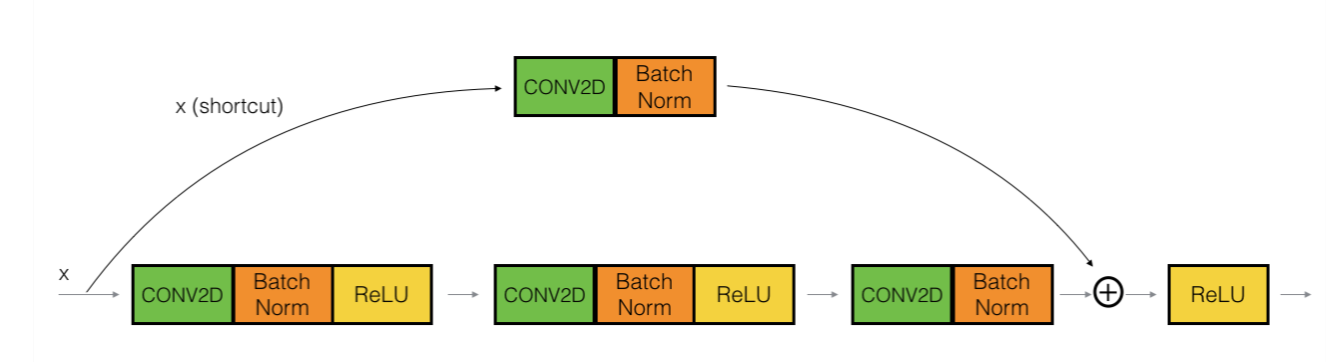

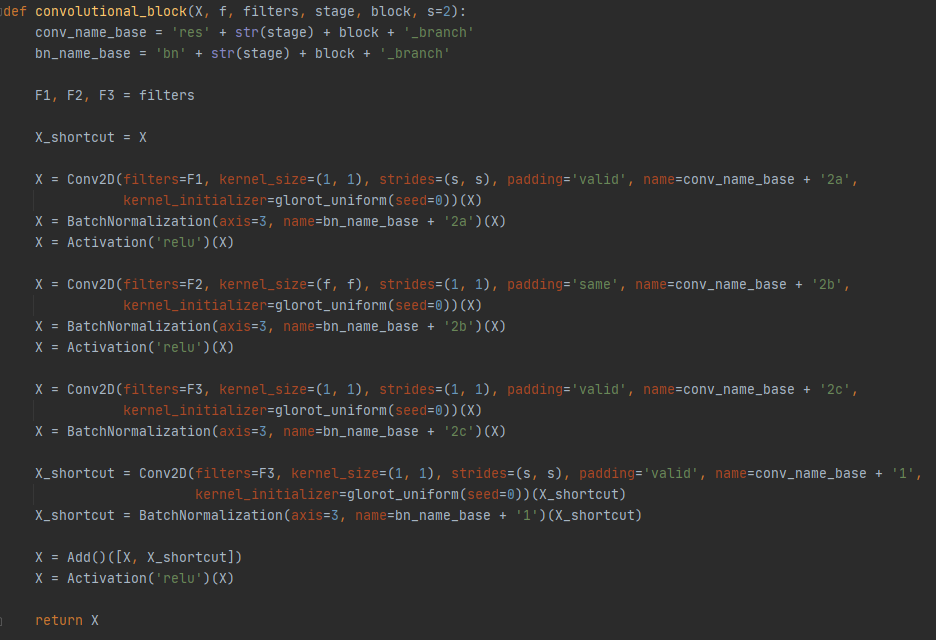




The structure of ResNet50 is built following the structure introduced in the paper "Deep Residual Learning for Image Recognition".
The identity shortcut can directly be used in the circumstances of input and output have the same dimensions (solid line). And there are two options why the dimensions increase (dotted line), the first one is that a extrz zero padding is applied for increasing the dimensions, which the shortcut still performs identity mapping; The second one is using a linear projection by the shorcut connections to match the dimensions (Kaiming, Xiangyu, Shaoqing, Jian, 2016)

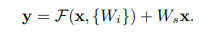

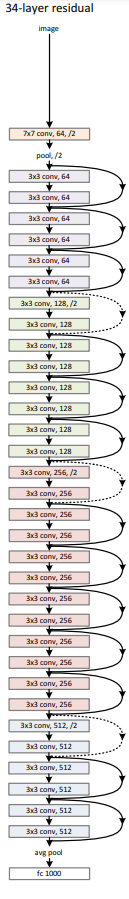

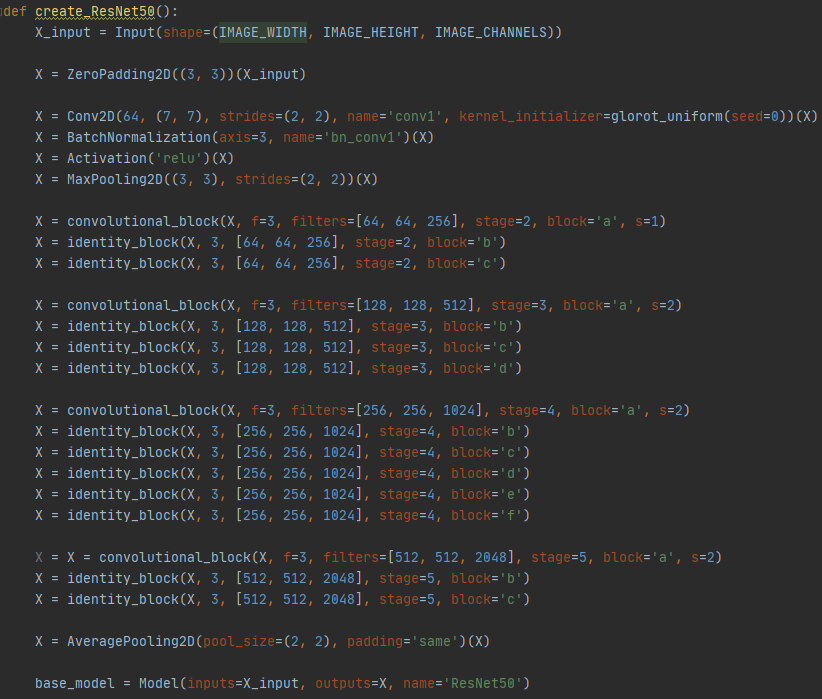


==============================

In this project, the result provided by ResNet50 is very good and here is the best result:

"loss: 0.0155 - accuracy: 0.9964 - val_loss: 0.1017 - val_accuracy: 0.9746"
(Use" earlystop = loss" and "ReduceLROnPlateau = val_accuracy" for callbacks, lr = 0.0002)

==============================






<h4>============================== Untested ==============================</h4>
<h4>InceptionResNetV2</h4>
The InceptionResNetV2 is a model that combine the concept of "shortcuts" from ResNet and Inception module, it aims to increase the depth or network to give a more accurate prediciton.

it use 1x1 convolution without activation to scaling up the dimensionality of the filter bank before the addition to match the depth of the input. This is needed to compensate for the dimensionality reduction induced by the Inception block.

The graph below is a simple structure of InceptionResNetV2:

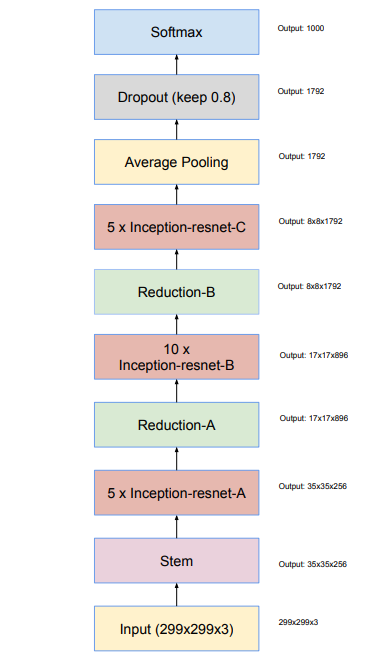

<h6>Stem</h6>
The schema for stem of the pure Inception-ResNet-v2 networks:

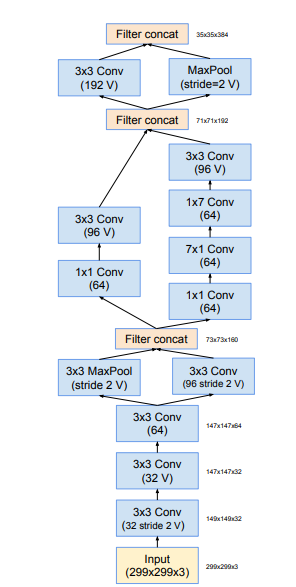


<h5>=============== Inception-ResNet ===============</h5>
The Inception-ResNet module used a asymmetry convolutional layer, it also used 1x1 convolution without activation to scaling up the dimensionality of the filter bank before the addition to match the depth of the input. This is needed to compensate for the dimensionality reduction induced by the Inception block.

<h6>Inception-ResNet-A</h6>
The schema for 35 × 35 grid module of the Inception-ResNet-v2 network:

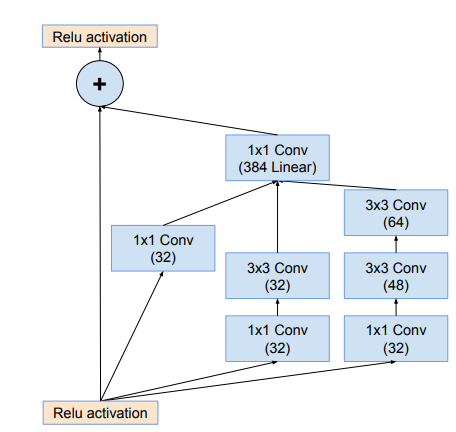
 
<h6>Inception-ResNet-B</h6>
The schema for 17 × 17 grid module of the Inception-ResNet-v2 network:

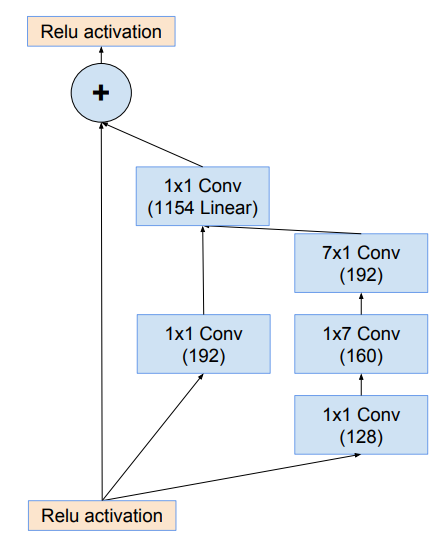

<h6>Inception-ResNet-C</h6>
The schema for 8×8 grid module of the Inception-ResNet-v2 network:

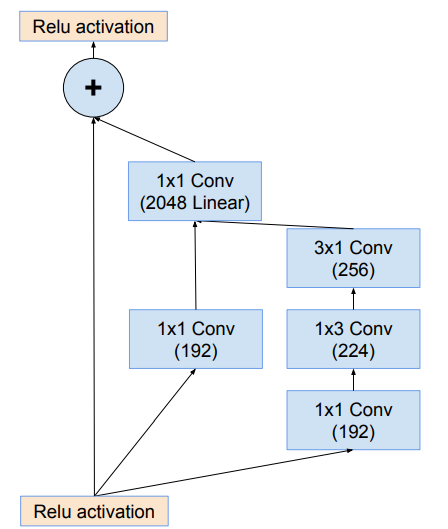



<h5>=============== Reduction ===============</h5>
The reduction module is used to slowly decrease the size of feature map slowly, in order to reduce the loss of feature information.

<h6>Reduction-A</h6>
The schema for 35 × 35 to 17 × 17 reduction module of Inception-ResNet-v2 network:

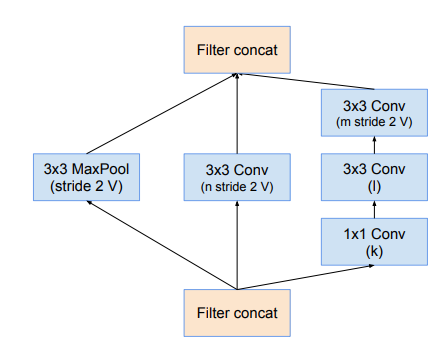

<h6>Reduction-B</h6>
The schema for 17 × 17 to 8 × 8 grid-reduction module of the Inception-ResNet-v2 network:

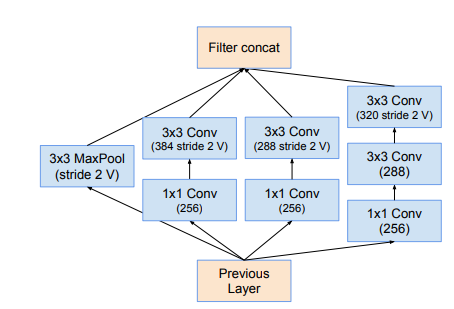



<h6>Activation ScalingC</h6>
The general schema for scaling combined Inceptionresnet moduels:
![image-14.png](attachment:image-14.png)



from https://arxiv.org/pdf/1602.07261.pdf (Inception-v4, Inception-ResNet and
the Impact of Residual Connections on Learning)





<h2> Model Chosen </h2>

From the above result, the <b>ResNet50</b> and <b>EfficientNet-B7</b> has the highest accuracy which is 0.9964 and 0.9984.
Therefore the final model will be chosen between them. Before selection, there are few things need to be consider other than the training accuracy, which is the generalization error, it is kind of presenting the how accurate the model perform with the unseen data. To review the generalization capabilities, val_loss and val_accuracy need to be measure :

<b>ResNet50</b>         val_loss: 0.1017 - val_accuracy: 0.9746


<b>EfficientNetB7</b>    val_loss: 0.0719 - val_accuracy: 0.9804



The result show that EfficientNet-B7 perform better than the ResNet50, however, the val_loss and val_accuracy of EfficientNet is more unstable than the ResNet50, from the graph below, it is easy to see that the val_loss and val_accuracy of EfficientNet is more fluctuating than the ResNet50


ResNet50 :

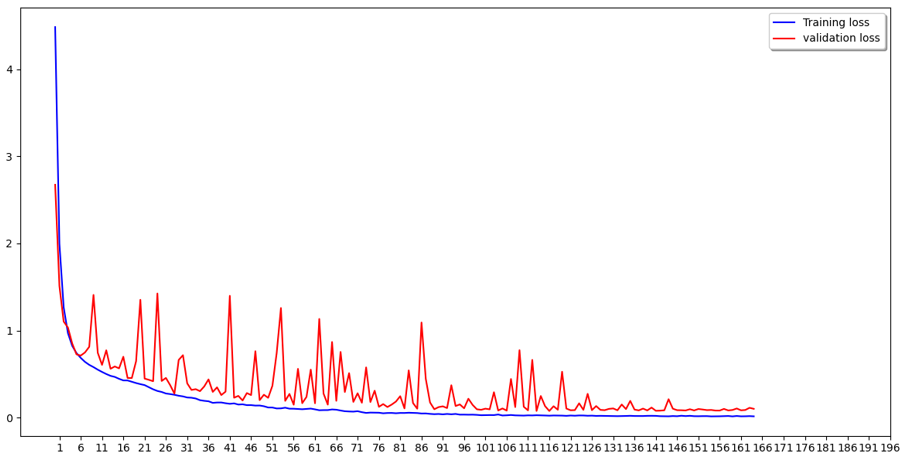    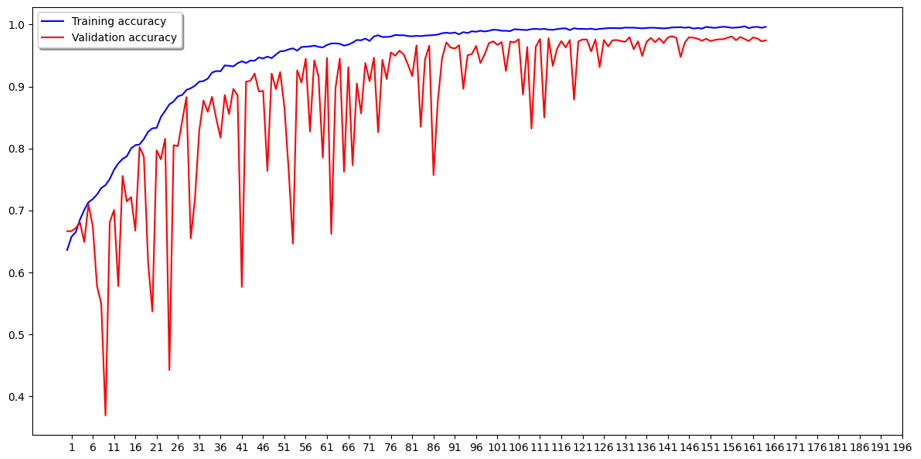


EfficientNet-B7 :

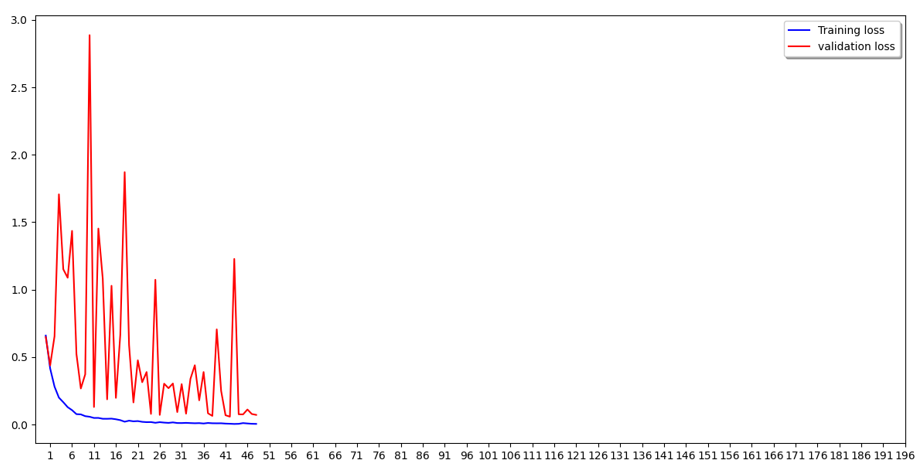    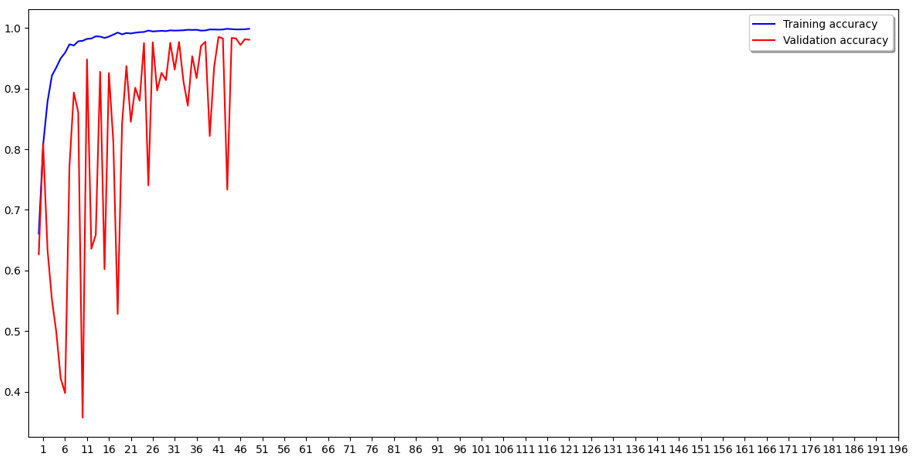



The reason why the EfficientNet-B7 has a more fluctuating val_loss and val_accuracy may due to its large scale of network and overfitting. 
<b>The EfficientNet_B7 is finally be chosen</b> because it have the highest training and validation accuracy. But the fluction problem cannot be ignore due to the fact that it may affect the reason of testing. Some modification one early stopping and learning rate have been tested, but it does not give a satisfy reason. Therefore, some modification has been done to the top level layer of the EfficientNet_B7:

The orignial top level layer flatten the output of model and added a flatten layer followed with a fully connect layer, then a drop out is added followed with two  fully connect layer. One of the method suggested by Mr Hanwei is to use drop out to improve model generalization capabilities.


Before : 
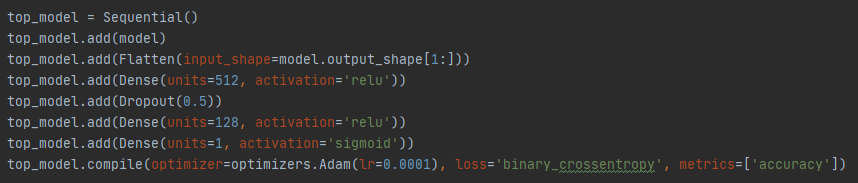


After : 
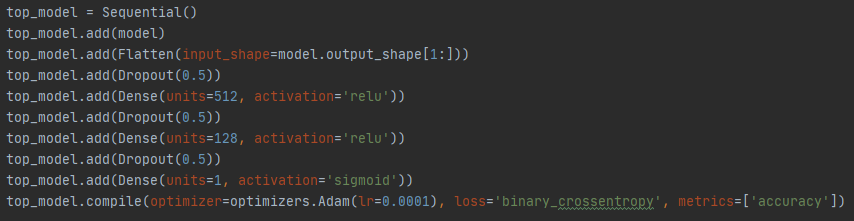


However, the result does not improve much which the val_loss and val_accuracy still very fluctuate 

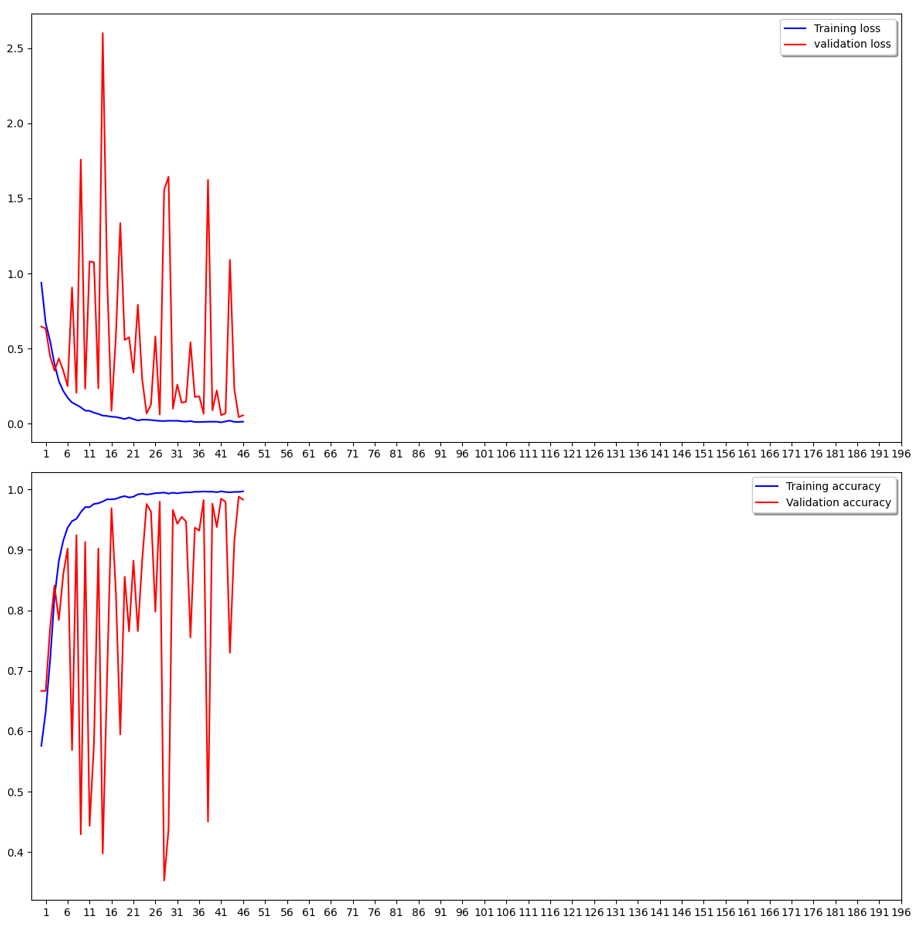



Therefore, another method suggested by Mr Hanwei have been added on top of the dropout appoach, which is regularization term - L2 norm for the fully connected layer.

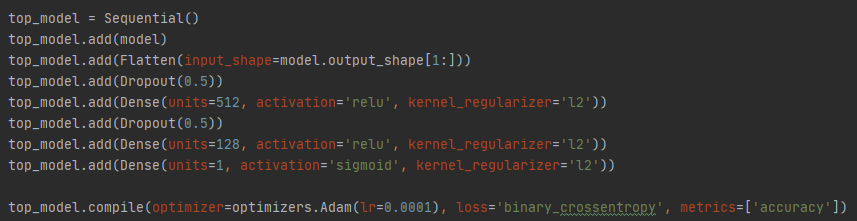


After introduced the L2 norm, the result did improved in later training preiod and especially for the validation loss. Moreover, there are tiny improvement in the performance. And the final model for this project is based on such approach. 

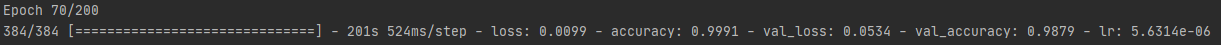

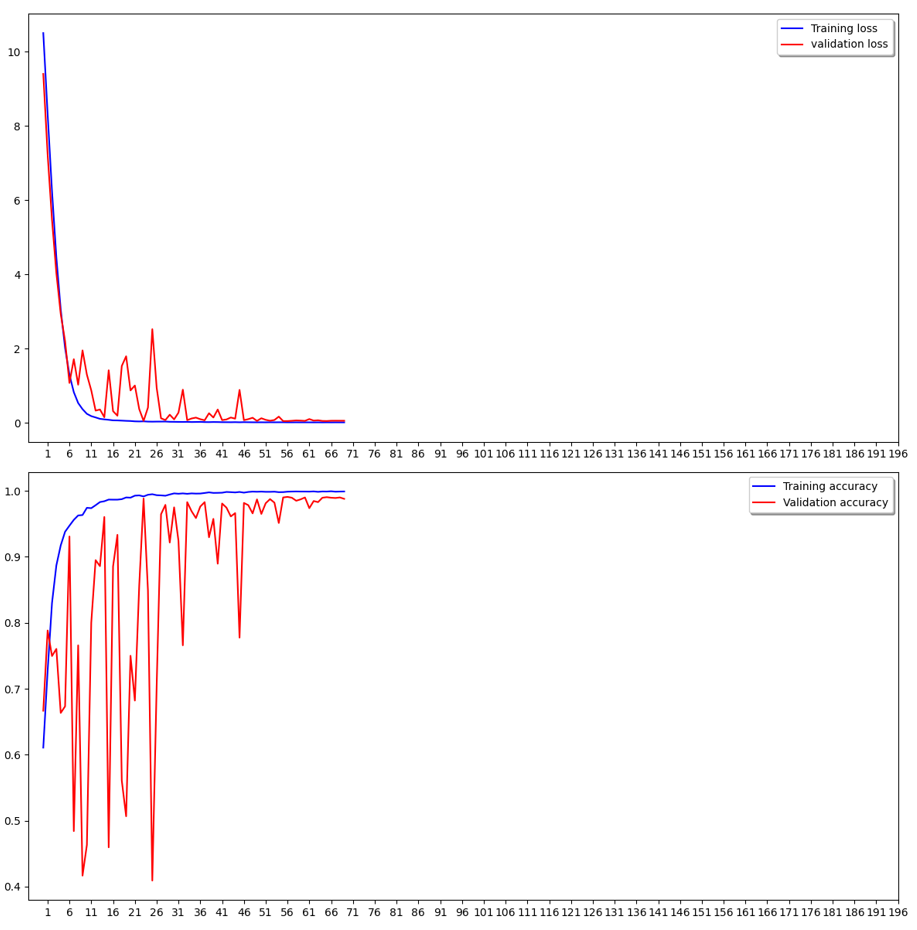






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import os
import shutil
import cv2 as cv
from PIL import Image
import keras
from keras import models
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
# from keras.utils import to_categorical
from keras.models import Sequential
from keras.models import Model, load_model
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, \
    AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout, GlobalAveragePooling2D, Resizing, LeakyReLU
from keras.applications.efficientnet import EfficientNetB0, EfficientNetB3, EfficientNetB5, EfficientNetB7
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import initializers, layers
from tensorflow.keras import optimizers
from keras.initializers import glorot_uniform
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.utils.layer_utils import get_source_inputs
from keras_vggface.vggface import VGGFace
from sklearn.model_selection import train_test_split
from keras.applications.resnet import ResNet50
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.utils import to_categorical
from keras import backend as K

from mtcnn.mtcnn import MTCNN

Calulate the recall and precisiom of the prediction for testing module.

In [2]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

===============================================================================================================================

The MTCNN is used to preprocess of a face-based image, it can decrease the transformation of image include "rotation", "Translation", "Scale", etc.
By using the MTCNN libaray in OpenCV, we can locate the facial landmark include "nose", 'mouth_left', 'mouth_right', 'right_eye' and 'left_eye'. With the location of those facial landmark, we can do face alignment on the input image and focus on human's face. The matrix calculation is done by the function "affineMatrix"
Another function "mtcnn_for_testing" is built for handling the different format of input images, there are only minor difference in between the mtcnn for training data.

source : https://u9534056.medium.com/%E7%94%A8mtcnn%E6%8C%91%E6%88%B0%E6%9C%80%E7%B0%A1%E5%96%AE%E7%9A%84face-alignment-fe8d79d74043

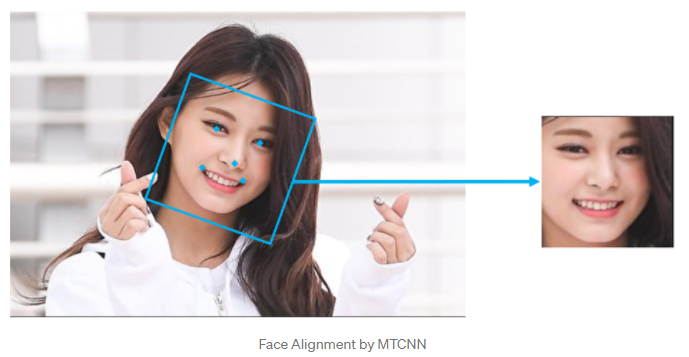

1. we translate to origin to the nose(We assume the nose as center of image).
2. we rotate the image of origin to make the nose "face up", base on the eyes' location (make the eyes horizontal)
3. We translate the target origin to face's left botton corner
4. we crop the image to target size
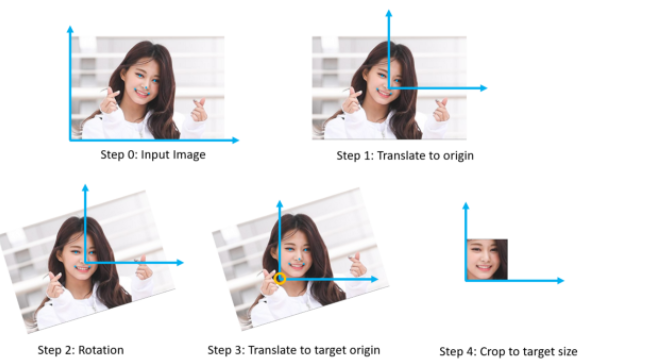


Some example of the dataset (Input size = (299,299), Output size = (128, 128))

Before :
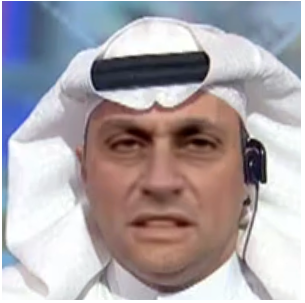
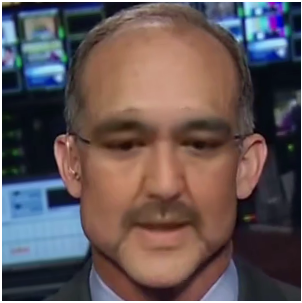
After :
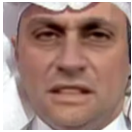
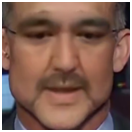


Example of performance effect :

The best accuracy of not using MTCNN using ResNet50 : 0.9912

The best accuracy of using MTCNN using ResNet50 : 0.9964

In [3]:
def affineMatrix(lmks, scale=2.5):
    nose = np.array(lmks['nose'], dtype=np.float32)
    left_eye = np.array(lmks['left_eye'], dtype=np.float32)
    right_eye = np.array(lmks['right_eye'], dtype=np.float32)
    eye_width = right_eye - left_eye
    angle = np.arctan2(eye_width[1], eye_width[0])
    center = nose
    alpha = np.cos(angle)
    beta = np.sin(angle)
    w = np.sqrt(np.sum(eye_width ** 2)) * scale
    m = [[alpha, beta, -alpha * center[0] - beta * center[1] + w * 0.5],
         [-beta, alpha, beta * center[0] - alpha * center[1] + w * 0.5]]
    return np.array(m), (int(w), int(w))  # （affine matrix, target size)


def mtcnn(mtcnn_dir, training_dir):
    detector = MTCNN(steps_threshold=[0.0, 0.0, 0.0])
    for i in training_dir:
        print("processing ", i)
        img = cv.imread(training_dir + i)
        faces = detector.detect_faces(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        face = max(faces, key=lambda x: x['confidence'])
        mat, size = affineMatrix(face['keypoints'])

        tmp = cv.warpAffine(img, mat, size)
        cv.imwrite(mtcnn_dir + i, tmp)

        img = Image.open(mtcnn_dir + i)
        new_img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        new_img.save(mtcnn_dir + i)
        
def mtcnn_for_testing(mtcnn_dir, img_dir):
    detector = MTCNN(steps_threshold=[0.0, 0.0, 0.0])

    if not os.path.exists(mtcnn_dir):
        os.makedirs(mtcnn_dir)

    print("Process MTCNN ")

    for i in img_dir:
        print("processing ", i)
        filename = i.split("/")[-1]
        dir = i.split("/")[1]
        
        img = cv.imread(i)
        faces = detector.detect_faces(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        face = max(faces, key=lambda x: x['confidence'])
        mat, size = affineMatrix(face['keypoints'])

        tmp = cv.warpAffine(img, mat, size)
        img = Image.fromarray(cv.cvtColor(tmp,cv.COLOR_BGR2RGB))
        #　cv.imwrite(mtcnn_dir + filename, tmp)
        # img = Image.open(mtcnn_dir + filename)
        img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT))
        img.save(mtcnn_dir + dir + "_" + filename)

Create EfficientNet B7 using keras's libaray, without using the pretrained weight. L2 norm has been applied to each fully connected layer to regularize the output in order to improve the overfitting problem (fluction of validation accurcy)

In [4]:
def create_EfficientNet():
    # model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3),
    #                        pooling='max')
    # model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3),
    #                        pooling='max')
    # model = EfficientNetB5(weights="imagenet", include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3),
    #                        pooling='max')
    model = EfficientNetB7(weights="imagenet", include_top=False, input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3),
                           pooling='max')
    print('Model loaded.')

    top_model = Sequential()
    top_model.add(model)
    top_model.add(Flatten(input_shape=model.output_shape[1:]))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(units=512, activation='relu', kernel_regularizer='l2'))
    top_model.add(Dropout(0.5))
    top_model.add(Dense(units=128, activation='relu', kernel_regularizer='l2'))
    top_model.add(Dense(units=1, activation='sigmoid', kernel_regularizer='l2'))

    top_model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), loss=loss_function, metrics=['acc',precision_m, recall_m])

    return top_model

===============================================================================================================================

The preprocessing function is used to create a dataframe using Pandas to store each image and its label 

In [5]:
def preprocessing(deepfake_dir, face2face_dir, real_dir, training_dir, Re_save=False, mt_cnn=False):
    deepfake_img = os.listdir(deepfake_dir)
    face2face_img = os.listdir(face2face_dir)
    real_img = os.listdir(real_dir)

    if Re_save:
        if not os.path.exists(training_dir):
            os.makedirs(training_dir)

        for filename in deepfake_img:
            print("Deepfake")
            original = deepfake_dir + filename
            target = training_dir + 'deepfake_' + filename
            shutil.copyfile(original, target)

        for filename in face2face_img:
            print("Face2Face")
            original = face2face_dir + filename
            target = training_dir + 'face2face_' + filename
            shutil.copyfile(original, target)

        for filename in real_img:
            print("Real")
            original = real_dir + filename
            target = training_dir + 'real_' + filename
            shutil.copyfile(original, target)

    if mt_cnn:
        mtcnn_dir = './testing/'
        mtcnn(mtcnn_dir, training_dir)
        training_img = os.listdir("./testing/")
    else:
        training_img = os.listdir("./training_data/")

    categories = []
    for i in training_img:
        tmp = i.split("_")[0]
        if tmp == "deepfake":
            categories.append("fake")
        elif tmp == "face2face":
            categories.append("fake")
        else:
            categories.append("real")

    df = pd.DataFrame({
        'filename': training_img,
        'category': categories
    })

    return df

===============================================================================================================================

The function "generate_data_set" is used to create a data for both training set and validation set.

All the image data are first be split to training set and validation stratified base on there label, which both training set and validation set should have the same ratio of fake and real image. The validation data occupied 20% of the data.

The training data will be transform randomly in each epoch, transformation included rotation, rescale, shear, zoom, horizontal flipping, width and height shifting.
The reason why random transformation is applied to the training data is to increase the number and diversity of training data, as a result it could improve the performance of the model.
Please noted that the validation data is also rescaled.


In [6]:
def generate_data_set(df, batch_size):
    df["category"] = df["category"].replace({0: 'fake', 1: 'real'})
    train_df, validate_df = train_test_split(df, test_size=0.20, random_state=None, stratify=df["category"])

    train_df = train_df.reset_index(drop=True)
    validate_df = validate_df.reset_index(drop=True)

    total_train = train_df.shape[0]
    total_validate = validate_df.shape[0]

    # Training Set
    train_datagen = ImageDataGenerator(
        rotation_range=15,
        rescale=1. / 255,
        shear_range=0.1,
        zoom_range=0.2,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1
    )

    train_generator = train_datagen.flow_from_dataframe(
        train_df,
        "./training_data/",
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,  # Default : 299, 299
        class_mode='binary',
        batch_size=batch_size
    )

    print(train_generator.class_indices)

    # =======================================================
    # Validation Set
    validation_datagen = ImageDataGenerator(rescale=1. / 255)
    validation_generator = validation_datagen.flow_from_dataframe(
        validate_df,
        "./training_data/",
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='binary',
        batch_size=batch_size
    )

    print(validation_generator.class_indices)

    return train_generator, validation_generator, total_train, total_validate


===============================================================================================================================

Before fitting the model, some call back function is applied in the training process namely "Early Stopping" and "Reduce Learning Rate".

The EarlyStopping will stop the training in any epoch if it is found that the monitor value (validation loss) does not increase in next epoch.

The ReduceLROnPlateau is used to reduce the learning rate in any epoch if the monitor value (validation accuracy) does not increase in next 5 epoch. When reduction perform, it will multiple the factor(0.5) each time, and the minimum learning rate is set to be 0.00001 to prevent a very low learning rate that does not really improve the model.

Both of the approachs is used to prevent overfitting.

Some other monitor value have been tried but it is found that such setting provide a better preformance in validation data which assumed to have a better generalization error.

In [7]:
def model_training(model, train_data, validate_data, batch_size, num_train, num_validation):
    # Prevent the model being overfit
    earlystop = EarlyStopping(monitor='loss',
                              min_delta=0,
                              patience=5,
                              verbose=0, mode='auto')

    # Improve the learning rate
    learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                                patience=5,
                                                verbose=1,
                                                mode='auto',
                                                factor=0.75,
                                                min_lr=0.0000001)

    callbacks = [earlystop, learning_rate_reduction]

    total_train = num_train
    total_validate = num_validation
    batch_size = batch_size

    if TRAIN:
        epochs = 3 if FAST_RUN else 200

        history = model.fit(
            train_data,
            epochs=epochs,
            validation_data=validate_data,
            validation_steps=total_validate // batch_size,
            steps_per_epoch=total_train // batch_size,
            callbacks=callbacks
        )

        model.save_weights("./testing.h5")

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
        ax1.plot(history.history['loss'], color='b', label="Training loss")
        ax1.plot(history.history['val_loss'], color='r', label="validation loss")
        ax1.set_xticks(np.arange(1, epochs, 5))
        # ax1.set_yticks(np.arange(0, 1, 0.1))
        legend = ax1.legend(loc='best', shadow=True)

        ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
        ax2.plot(history.history['val_accuracy'], color='r', label="Validation accuracy")
        ax2.set_xticks(np.arange(1, epochs, 5))

        legend = ax2.legend(loc='best', shadow=True)
        plt.tight_layout()
        plt.savefig("./test.png")
        plt.show()

In [9]:
def test(img_path_list, true_class_list):
    
    model = create_EfficientNet()
    model.summary()
    
    # test_value = 20
    # print("Testing !")
    # print("Test value = ", test_value)
    # 
    # img_path_list = img_path_list
    # true_class_list = true_class_list
    # deepfake_img = os.listdir(deepfake_dir)
    # face2face_img = os.listdir(face2face_dir)
    # real_img = os.listdir(real_dir)
    # 
    # counter = 0
    # for filename in deepfake_img:
    #     if counter == test_value:
    #         original = deepfake_dir + filename
    #         img_path_list.append(original)
    #         true_class_list.append(0)
    # 
    #     if counter == 40:
    #         counter = 0
    #     else:
    #         counter += 1
    # 
    # counter = 0
    # for filename in face2face_img:
    #     if counter == test_value:
    #         original = face2face_dir + filename
    #         img_path_list.append(original)
    #         true_class_list.append(0)
    # 
    #     if counter == 40:
    #         counter = 0
    #     else:
    #         counter += 1
    # 
    # counter = 0
    # for filename in real_img:
    #     if counter == test_value:
    #         original = real_dir + filename
    #         img_path_list.append(original)
    #         true_class_list.append(1)
    # 
    #     if counter == 40:
    #         counter = 0
    #     else:
    #         counter += 1
    # 
    # counter = 0
    # for i in os.listdir("./testing/"):
    #     if counter == test_value:
    #         img_path_list.append("./testing/" + i)
    #         if i.split("_")[0] == "r" :
    #             true_class_list.append('1')
    #         else:
    #             true_class_list.append('0')
    #             
    #     if counter == 4:
    #         counter = 0
    #     else:
    #         counter += 1# 

    
    mtcnn_dir = "./mtcnn/"
    mtcnn_for_testing(mtcnn_dir, img_path_list)
    
    img_path_list = []
    for i in os.listdir(mtcnn_dir):
        img_path_list.append(mtcnn_dir + i)
    

    test_df = pd.DataFrame({
        'filename': img_path_list,
        'category' : true_class_list
    })
    
    
    test_df["category"] = test_df["category"].replace({'0': 'fake', '1': 'real'})
    test_df["category"] = test_df["category"].replace({0: 'fake', 1: 'real'})

    test_datagen = ImageDataGenerator(rescale=1. / 255)
    test_generator = test_datagen.flow_from_dataframe(
        test_df,
        x_col='filename',
        y_col='category',
        target_size=IMAGE_SIZE,
        class_mode='binary',
        batch_size=batch_size
    )
    # model.load_weights("./EfficientNet/EfficientNet_B7_drop+L2.h5")
    model.load_weights("./EfficientNet/B7_V1.h5")
    predict = model.evaluate(test_generator)
    
    loss = predict[0]
    accuracy = predict[1]
    precision = predict[2]
    recall = predict[3]
        
    return accuracy, recall, precision


<h2>REMARK</h2>

The testing process may take a bit of time due to the face that the MTCNN need some times to resave the data to another folder.

In [10]:

TRAIN = False
TEST = True
Re_save_data = False
use_mt_cnn = False
FAST_RUN = False
batch_size = 25
loss_function = 'binary_crossentropy'
learning_rate = 0.0001
momentum = 0.9
metrics = 'accuracy'

IMAGE_WIDTH = 128 # 299 - orignial data, 128 - MCTNN
IMAGE_HEIGHT = 128 # 299 - orignial data, 128 - MCTNN
IMAGE_SIZE = (IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS = 3  # R, G, B

deepfake_dir = "./fake_deepfake/"
face2face_dir = "./fake_face2face/"
real_dir = "./real/"
training_dir = "./training_data/"
test_dir = "./test/"


if TRAIN:
    model = create_EfficientNet()

    model.summary()

    df = preprocessing(deepfake_dir, face2face_dir, real_dir, training_dir, Re_save_data, use_mt_cnn)

    train_set, validation_set, num_train, num_validation = generate_data_set(df, batch_size)
    
    test(model, train_set, validation_set, batch_size, num_train, num_validation)

# ====================================================
# FOR TESTING
img_path_list = []
true_class_list = []

if TEST:
    accuracy, recall, precision = test(img_path_list, true_class_list)
    print("The Preformance of model : ")
    print("accuracy = ", accuracy)
    print("recall = ", recall)
    print("precision = ", precision)
# ====================================================


Model loaded.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb7 (Functional)  (None, 2560)             64097687  
                                                                 
 flatten (Flatten)           (None, 2560)              0         
                                                                 
 dropout (Dropout)           (None, 2560)              0         
                                                                 
 dense (Dense)               (None, 512)               1311232   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 1)    

ValueError: All arrays must be of the same length